**Проект Яндекс.Практикума. Сбор и хранение данных**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Исследовательский анализ данных (EDA)**](#EDA)

[**Выводы и рекомендации**](#summary)

---




## **Описание проекта**<a  class="anchor" id="description"></a>

##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>

In [1]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from textwrap import fill
import numpy as np
import math
! pip install folium
import folium
from folium.features import DivIcon

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Функция для загрузки файлов с гугл-диска
def gdisk_gownload(link):
    url='https://drive.google.com/uc?id=' + link.split('/')[-2]
    return pd.read_csv(url)

In [3]:
# загружаем данные
try:
    df_1=pd.DataFrame(pd.read_csv(' '))
    df_2=pd.DataFrame(pd.read_csv(' '))    
except:
    df_1 = gdisk_gownload(' ')
    df_1 = gdisk_gownload(' ')

Загружаем файл с геоданными для городов России (подготовлен мной отдельно с использованием библиотеки https://pypi.org/project/geopy/1.9.1/).

In [4]:
    try:
        ! gdown --id 1jazlsjtiSeTynbaKqmN8aNErfHd3xZde
        geodata=pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Projects/Aircrafts/geodata.csv',index_col='Unnamed: 0'))
    
    except:
        url='https://drive.google.com/file/d/1jazlsjtiSeTynbaKqmN8aNErfHd3xZde/view?usp=sharing'
        url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
        geodata=pd.DataFrame(pd.read_csv(url2,index_col='Unnamed: 0'))

Downloading...
From: https://drive.google.com/uc?id=1jazlsjtiSeTynbaKqmN8aNErfHd3xZde
To: /content/geodata.csv
100% 4.30k/4.30k [00:00<00:00, 7.78MB/s]



## **Предобработка данных**<a  class="anchor" id="preparing"></a>



---


В таблице df_1 содержатся данные о моделях самолетов и количестве рейсов на них, совершенных в сентябре 2018. Пропусков и дублирующих записей нет. Типы данных соотвествуют их описанию.

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
df_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185




---

В таблице df_2 содержатся данные о городах прилета и количестве рейсов в них, совершенных в августе 2018. Пропусков и дублирующих записей нет. Типы данных соотвествуют их описанию.


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_2.duplicated().sum()

0

In [9]:
df_2.isna().sum()

city               0
average_flights    0
dtype: int64

In [10]:
df_2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


---


## **Исследовательский анализ данных (EDA)**<a  class="anchor" id="EDA"></a>



#### **ТОП-10 городов по количеству рейсов**

Определим первую десятку городов по количеству рейсов в них, осуществленных авиакомпанией F9 в августе 2018 года.

In [11]:
cities_top10=df_2.sort_values('average_flights',ascending=False).reset_index(drop=True).head(10)
cities_top10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645




---



#### **Построение графиков**


---



Построим график количества полетов для самолетов различных моделей.

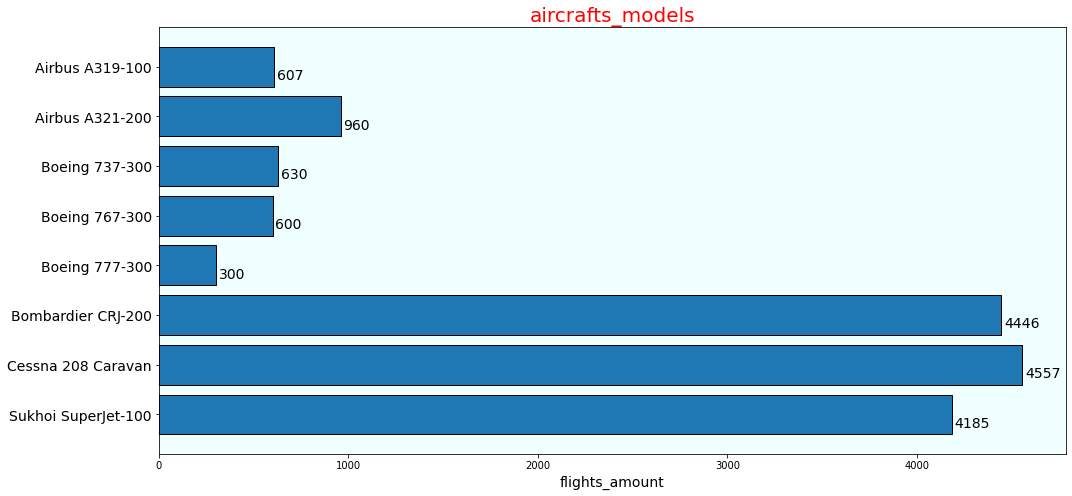

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 7))
ax.barh(df_1.model, df_1.flights_amount, align='center',ec='black')
ax.set_yticks(df_1.model)
ax.set_yticklabels(df_1.model, fontsize=14,color='black')
ax.invert_yaxis()
ax.set_xlabel('flights_amount', fontsize=14,color='black')
ax.set_title('aircrafts_models')
ax.title.set_fontsize(20)
ax.title.set_color('red')
for i, v in enumerate(df_1.flights_amount):
    ax.text(v + 15, i + .25, str(v), fontsize=14,color='black')
ax.set_facecolor('azure')

fig.tight_layout()
plt.show()

Абсолютное большинство рейсов F9 за сентябрь 2018 года приходится на самолеты малого и среднего радиуса действия: Bombardier CRJ-200, Cessna 208 Caravan и	Sukhoi SuperJet-100. Их доля составляет:

In [13]:
print(format(sum(df_1.query('model== "Bombardier CRJ-200" or model=="Sukhoi SuperJet-100" or model=="Cessna 208 Caravan"').flights_amount)/sum(df_1.flights_amount),'.1%'))

81.0%


Для расширения анализа дополним таблицу df_1 данными из открытых источников о средней пассажировместимости и дальности полетов для самолетов различных марок.

In [14]:
# пассажировместимость
capacity=[136,195,134,284,410,50,11,98]
df_1['capacity']=capacity

In [15]:
# радиус полетов
radius=[6850,5950,4200,9700,7000,3000,1200,3000]
df_1['radius']=radius

Рассчитаем максимальный потенциальный пассажирооборот и налЁт (в 1000 км) для самолетов различных марок. 

In [16]:
df_1['max_traffic']=df_1.flights_amount*df_1.capacity
df_1['max_range']=df_1.flights_amount*df_1.radius/1000

Построим графики максимально возможных пассажирооборота и суммарной дальности полетов для парка самолетов авиакомпании F9 за сентябрь 2018 в разрезе моделей.

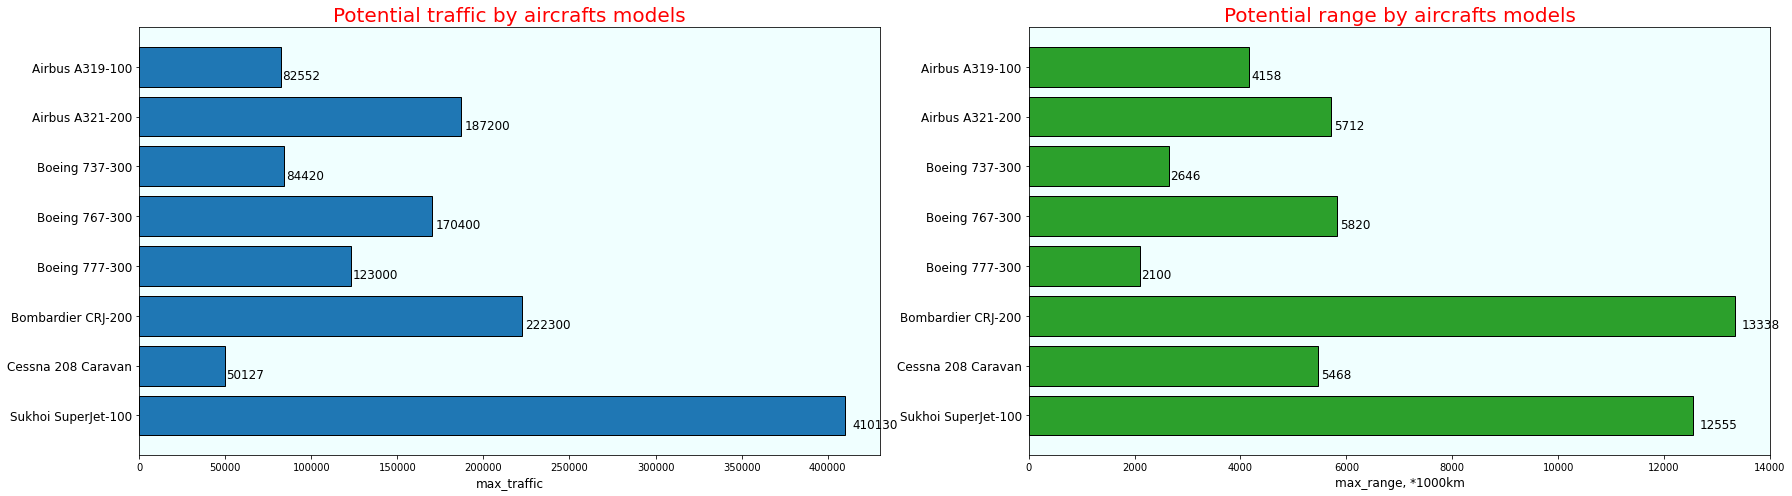

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25, 7))
axes[0].barh(df_1.model, df_1.max_traffic, align='center',ec='black')
axes[0].set_yticks(df_1.model)
axes[0].set_yticklabels(df_1.model, fontsize=12,color='black')
axes[0].invert_yaxis()
axes[0].set_xlabel('max_traffic', fontsize=12,color='black')
axes[0].set_title('Potential traffic by aircrafts models')
axes[0].title.set_fontsize(20)
axes[0].title.set_color('red')
for i, v in enumerate(df_1.max_traffic):
    axes[0].text(v*1.01, i + .25, str(v), fontsize=12,color='black')
axes[0].set_facecolor('azure')

axes[1].barh(df_1.model, df_1.max_range, align='center',ec='black', color='tab:green')

axes[1].set_yticks(df_1.model)
axes[1].set_yticklabels(df_1.model, fontsize=12,color='black')
axes[1].invert_yaxis()
axes[1].set_xlabel('max_range, *1000km', fontsize=12,color='black')
axes[1].set_title('Potential range by aircrafts models')
axes[1].title.set_fontsize(20)
axes[1].title.set_color('red')
for i, v in enumerate(df_1.max_range):
    axes[1].text(v*1.01, i + .25,format(v, '.0f'), fontsize=12,color='black')
axes[1].set_facecolor('azure')
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()

Несмотря на то, что лёгкий одномоторный турбовинтовой самолёт Cessna 208 Caravan лидировал в сентябре 2018 года по количеству рейсов и мог бы обеспечить налет в 5,5 млн. км, эта модель при максимальной загрузке потенциально смогла бы генерировать самый маленький пассажирский трафиик.

Проанализируем показатели использования в парке авиакомпании F9 среднемагистральных самолетов моделей Bombardier CRJ-200 и Sukhoi SuperJet-100. Суммарно они обеспечили

In [18]:
grand_two=df_1.query('model== "Bombardier CRJ-200" or model=="Sukhoi SuperJet-100"')
print(format(sum(grand_two.flights_amount)/sum(df_1.flights_amount),'.1%'), 'рейсов.')

53.0% рейсов.


При равной процентной загрузке рейсов авиакомпании для самолетов разных моделей, на долю "Большой двойки" пришлось бы 

In [19]:
print(format(sum(grand_two['max_traffic'])/sum(df_1['max_traffic']),'.1%'),'пассажирооборота и',format(sum(grand_two['max_range'])/sum(df_1['max_range']),'.1%'),'налета.')

47.5% пассажирооборота и 50.0% налета.




---



Построим график количества рейсов в разные города России, совершенных самолетами авиакомпании F9 в августе 2018 года. Для цели визуализации округлим среднее количество прибывавших рейсов до 0,1 и сгруппируем города.

In [20]:
df_grupped=df_2.copy()
df_grupped['average_flights']=df_grupped.apply(lambda x:math.ceil(x.average_flights*10)/10,axis=1)
df_grupped=df_grupped.groupby('average_flights', as_index = False).agg({'city': ', '.join})
df_grupped.sort_values('average_flights',ascending=False,inplace=True)

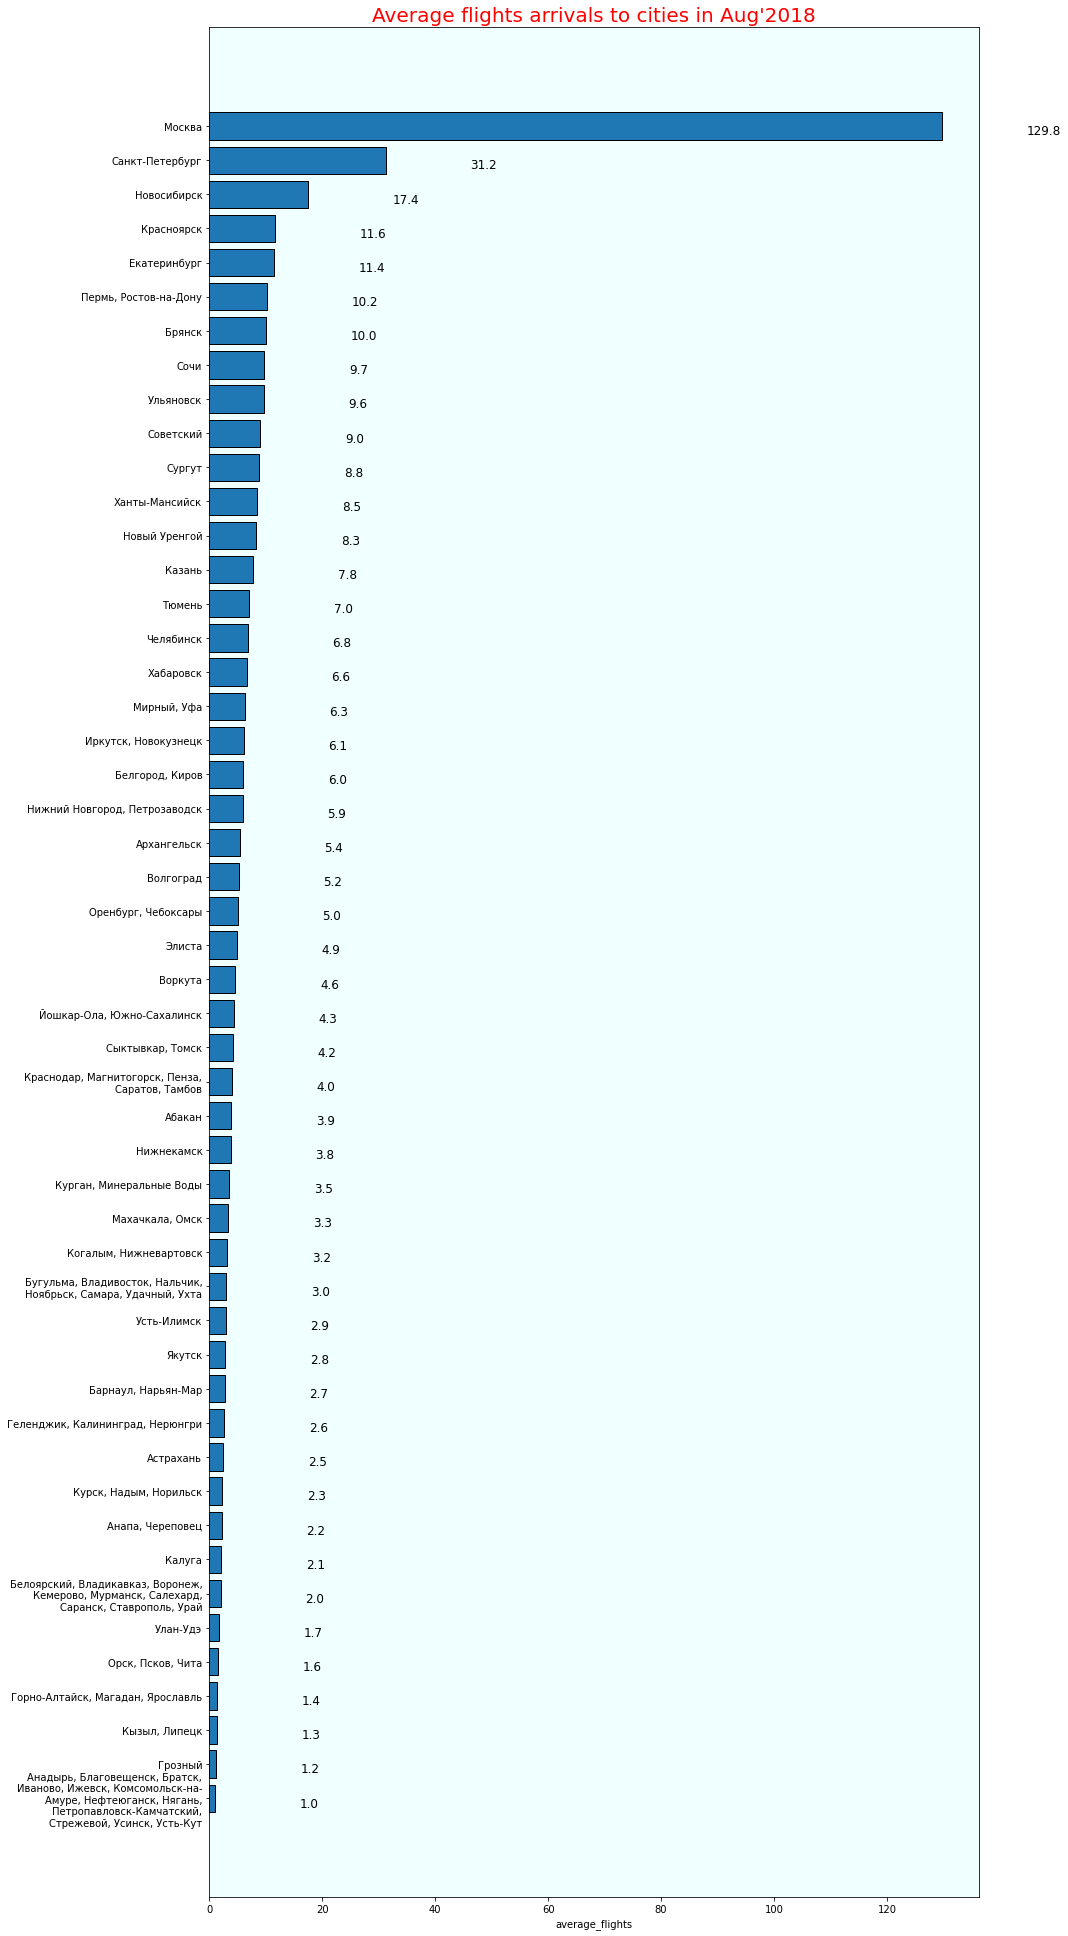

In [21]:

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 27))
ax.barh(df_grupped.city, df_grupped.average_flights, align='center',ec='black')
ax.set_yticks(df_grupped.city)
labels=[fill(l,35) for l in df_grupped.city]
ax.set_yticklabels(labels, fontsize=10,color='black')
ax.invert_yaxis()

ax.set_xlabel('average_flights', fontsize=10,color='black')
ax.set_title("Average flights arrivals to cities in Aug'2018")
ax.title.set_fontsize(20)
ax.title.set_color('red')
for i, v in enumerate(df_grupped.average_flights):
    ax.text(v + 15, i + .25, v, fontsize=12,color='black')
ax.set_facecolor('azure')
fig.tight_layout()
plt.show()

График демонстрирует, что большинство направлений для авиакомпании F9 обслуживаются нерегулярными рейсами: менее одного рейса в неделю выполняется в 61 город из 101.

In [22]:
df_2.query('average_flights<4')['city'].count()

61

Создадим интерактивную карту направлений и среднего количества полетов авиакомпании F9 в августе 2018 года.

In [23]:
df_2_geo=df_2.merge(geodata,how='left',on='city')

In [24]:
m = folium.Map(location=(66.25, 94.15),zoom_start=3,min_zoom=3,max_zoom=5, tiles='cartodbpositron')

def markers(x,m):
    location = [x.latitude,x.longitude]
    folium.Marker(location, icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(7,20),
            html='<div style="font-size: 10pt; color : grey">'+x.city+'</div>',
            ),popup=format(x.average_flights,'.1f')).add_to(m)
    m.add_child(folium.CircleMarker(location, radius=2))

df_2_geo.apply(lambda x:markers(x,m),axis=1)
m



---

Построим график отображающий среднее количество полетов в города, входящие в десятку приоритетных направлений для авиакомпании F9 в августе 2018 года.

In [25]:
print('Среднее суммарное количество полетов по Топ-10 направлениям: {:.1f}'.format(sum(cities_top10.average_flights)))

Среднее суммарное количество полетов по Топ-10 направлениям: 250.7


In [26]:
print('Среднее суммарное количество полетов по направлениям, не входящим в Топ-10: {:.1f}'.format(sum(df_2.query('city not in @cities_top10.city')['average_flights'])))

Среднее суммарное количество полетов по направлениям, не входящим в Топ-10: 304.2


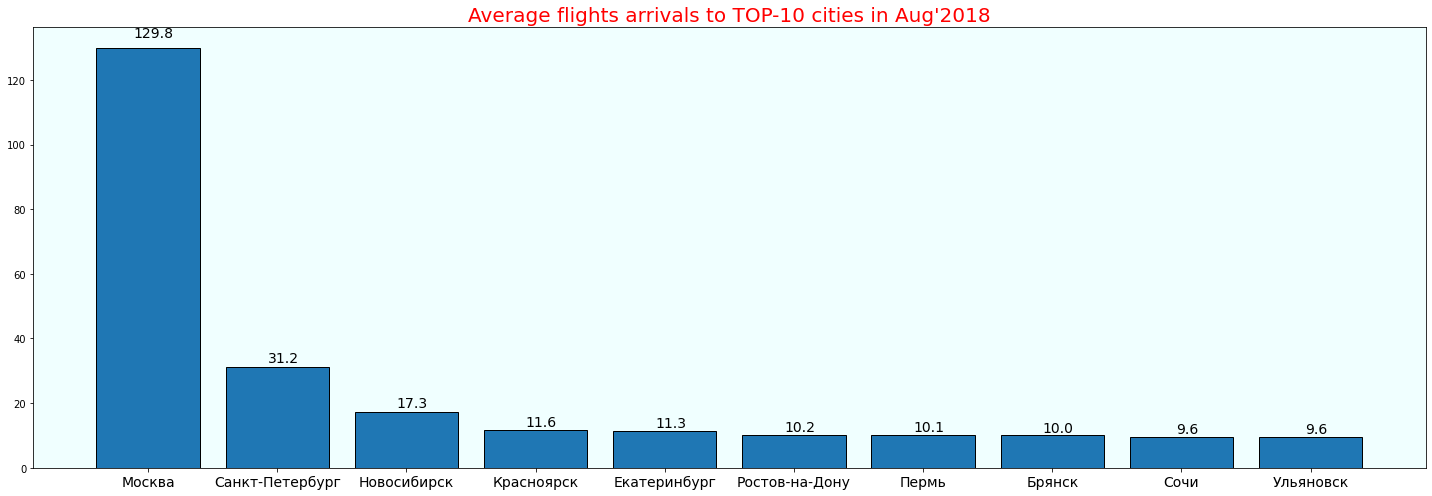

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20, 7))
x=np.arange(1,11)
bar=ax.bar(x, cities_top10.average_flights, ec='black', align='center')
ax.set_xticks(x)
ax.set_xticklabels(cities_top10.city, fontsize=14,color='black')
for b in bar:
    h = b.get_height()
    ax.text(b.get_x()+b.get_width()/1.8, 1.02*h, format(h, '.1f'), ha='center', va='bottom', fontsize=14)

ax.set_title("Average flights arrivals to TOP-10 cities in Aug'2018")
ax.title.set_fontsize(20)
ax.title.set_color('red')
ax.set_facecolor('azure')
fig.tight_layout()
plt.show()

Наиболее загруженным является маршрут в крупнейший авиационный хаб - Московский. В среднем туда осуществлялось не менее 4 вылетов в день. 

Ежедневные рейсы вылетали в Пулково (г. санкт-Петербург), через день и чаще в Толмачёво (г. Новосибирск).

Остальные направления из Топ-10 менее загруженные, полеты туда осущестлялись с интервалом 3-4 дня.



---



## **Выводы**<a  class="anchor" id="summary"></a>

Авиакомпания F9 эксплуатирует парк самолетов восьми моделей. Наиболее эксплуатируемыми являются борты моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 (81% вылетов в сентябре 2018 года).

По 60% направлений авиакомпания совершает чартерные рейсы, а на долю городов из Топ-10 по прилетам приходится 48,8% среднего количества принимаемых рейсов F9 в сентябре 2018 года.

Интенсивнее всего авиакомпания F9 работает в центральной полетной зоне: на долю хабов Москвы и Санкт-Петербурга приходился в сренем 161 рейс из 250 совершенных по Топ-10 направлениям.